<ipython-input-19-6194ae3d99e9>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(),inplace=True)


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        69
           1       0.88      0.86      0.87        86

    accuracy                           0.86       155
   macro avg       0.86      0.86      0.86       155
weighted avg       0.86      0.86      0.86       155



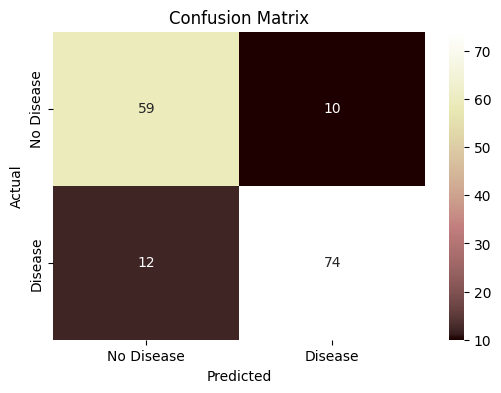

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart_disease.csv')

categorical_col=['sex','cp','restecg','thal','slope']
data_encoded = pd.get_dummies(data, columns=categorical_col, drop_first=True)

data_encoded['num']=data_encoded['num'].apply(lambda x:1 if x>0 else 0)

X = data_encoded.drop(columns=['id','dataset','num'])
y = data_encoded['num']


numerical_cols=X.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:

       X[col].fillna(X[col].mean(),inplace=True)

X=X.dropna()
y=y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', xticklabels=['No Disease','Disease'],yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






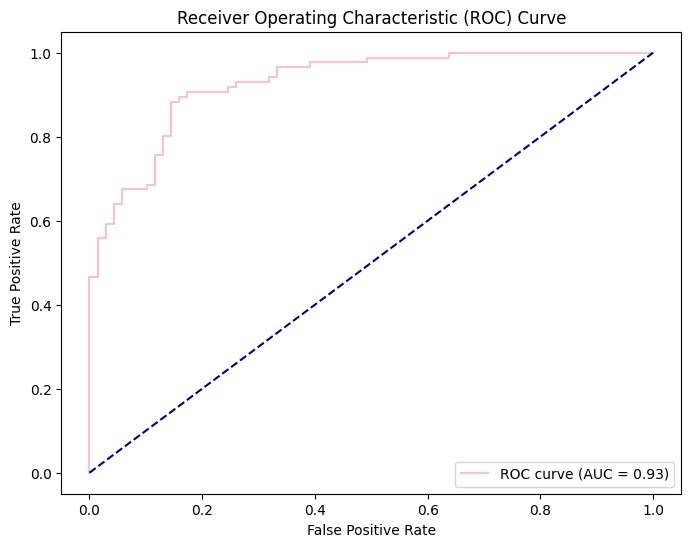

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink',  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()